In [16]:
%matplotlib inline
import os,random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import numpy
from tensorflow.keras.utils import HDF5Matrix
from sklearn.model_selection import train_test_split
filename = "GOLD_XYZ_OSC.0001_1024.hdf5"
mods = np.array(['32PSK', '16APSK', '32QAM', 'FM', 'GMSK','32APSK', 'OQPSK', '8ASK', 'BPSK', '8PSK', 'AM-SSB-SC', '4ASK', '16PSK', '64APSK', '128QAM', '128APSK', 'AM-DSB-SC', 'AM-SSB-WC', '64QAM', 'QPSK', '256QAM', 'AM-DSB-WC', 'OOK', '16QAM'])

In [17]:
data = h5py.File('new_data_01.h5', 'r') 
x = data.get('x').value
y = data.get('y').value
z = data.get('z').value

C:\Users\comin\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
C:\Users\comin\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\comin\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


In [18]:
tr_x, ts_x, tr_y, ts_y = train_test_split(x, y, test_size=0.3, random_state=444)
tr_z, ts_z = train_test_split(z, test_size=0.3, random_state=444)

In [19]:
model = tf.keras.models.load_model('new_11_13_02.h5')

In [20]:
batch_size = 1024
score = model.evaluate(ts_x, ts_y, verbose=1, batch_size=batch_size)

230032/230032 [==============================] - 8s 36us/sample - loss: 1.6028 - accuracy: 0.5885


In [21]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (15,15)

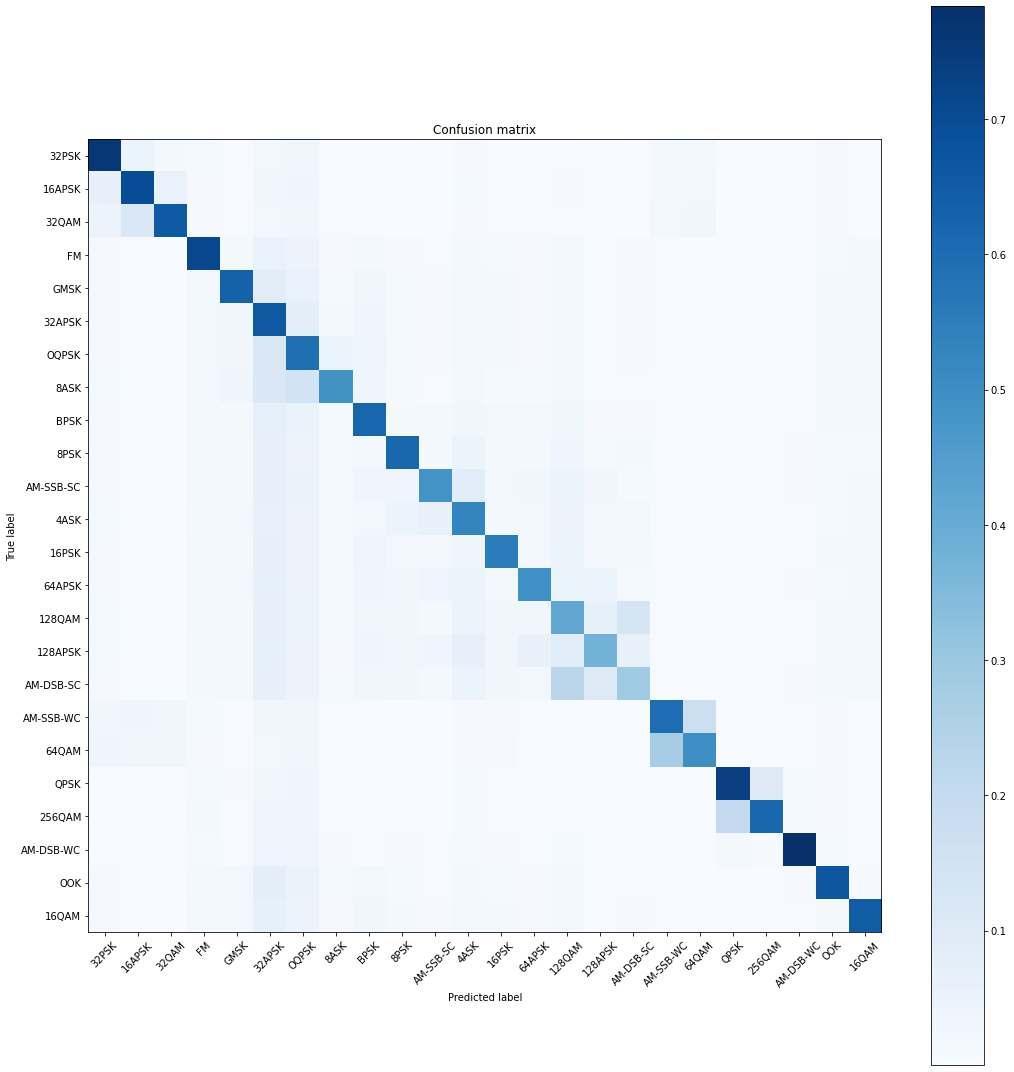

In [24]:
# Plot confusion matrix
Y_hat = model.predict(ts_x, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,ts_x.shape[0]):
    j = list(ts_y[i,:]).index(1)
    k = int(np.argmax(Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)
# Plot confusion matrix
acc = {}

Overall Accuracy:  0.06297775242441529
Overall Accuracy:  0.059114407732074624
Overall Accuracy:  0.06678639577954877
Overall Accuracy:  0.07662661527998187
Overall Accuracy:  0.0955948121645796
Overall Accuracy:  0.1407182258246088
Overall Accuracy:  0.18478879653876806
Overall Accuracy:  0.2456556082148499
Overall Accuracy:  0.3312021920310538
Overall Accuracy:  0.41986122170401546
Overall Accuracy:  0.5165336374002281
Overall Accuracy:  0.6107723577235772
Overall Accuracy:  0.7018427377818474
Overall Accuracy:  0.7927078600636075
Overall Accuracy:  0.8748994830557151
Overall Accuracy:  0.8952327537857544
Overall Accuracy:  0.9183627060830017
Overall Accuracy:  0.9212114438980777
Overall Accuracy:  0.9241371582250112
Overall Accuracy:  0.9225543478260869


C:\Users\comin\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Overall Accuracy:  0.9242819843342036
Overall Accuracy:  0.9225551158846806
Overall Accuracy:  0.9204711160964666
Overall Accuracy:  0.9224137931034483
Overall Accuracy:  0.9232343909928352
Overall Accuracy:  0.9179372197309417


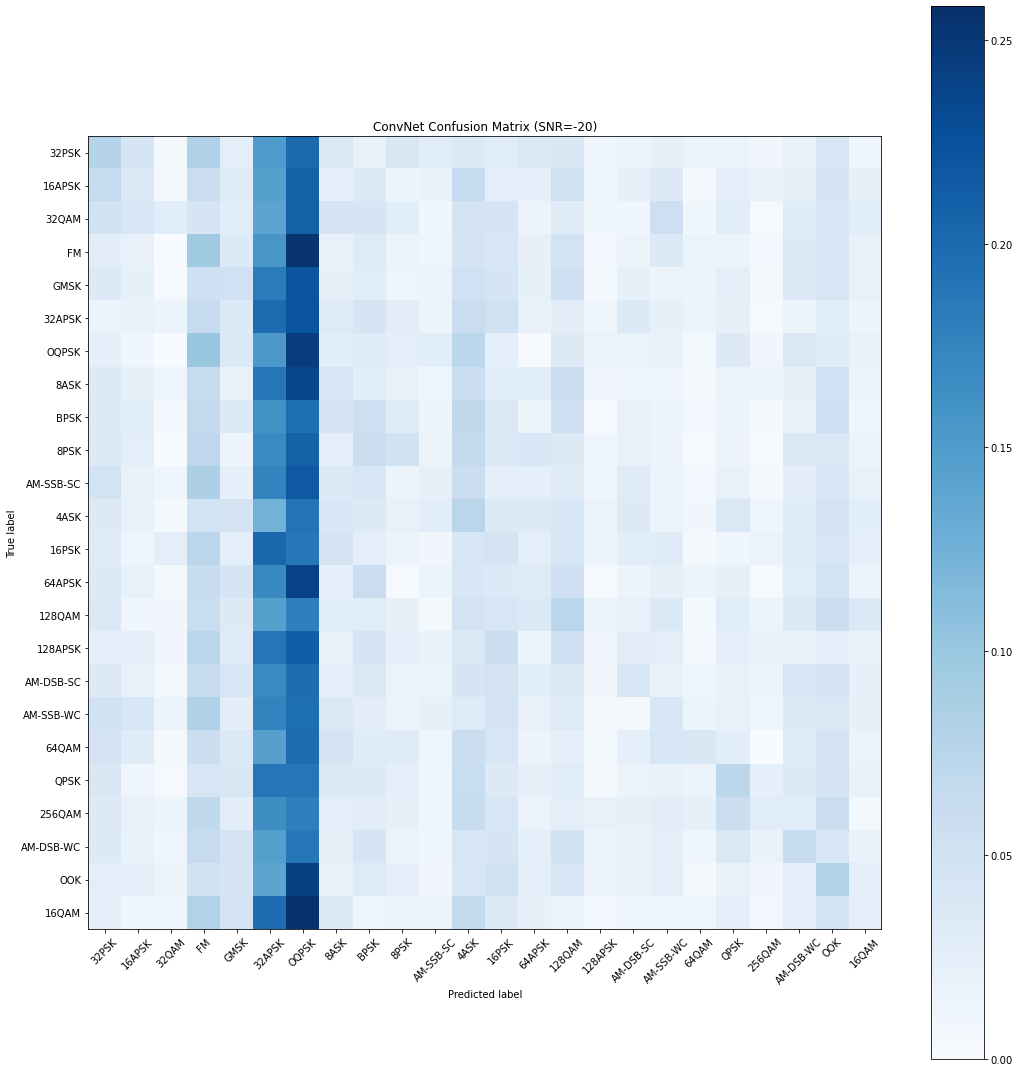

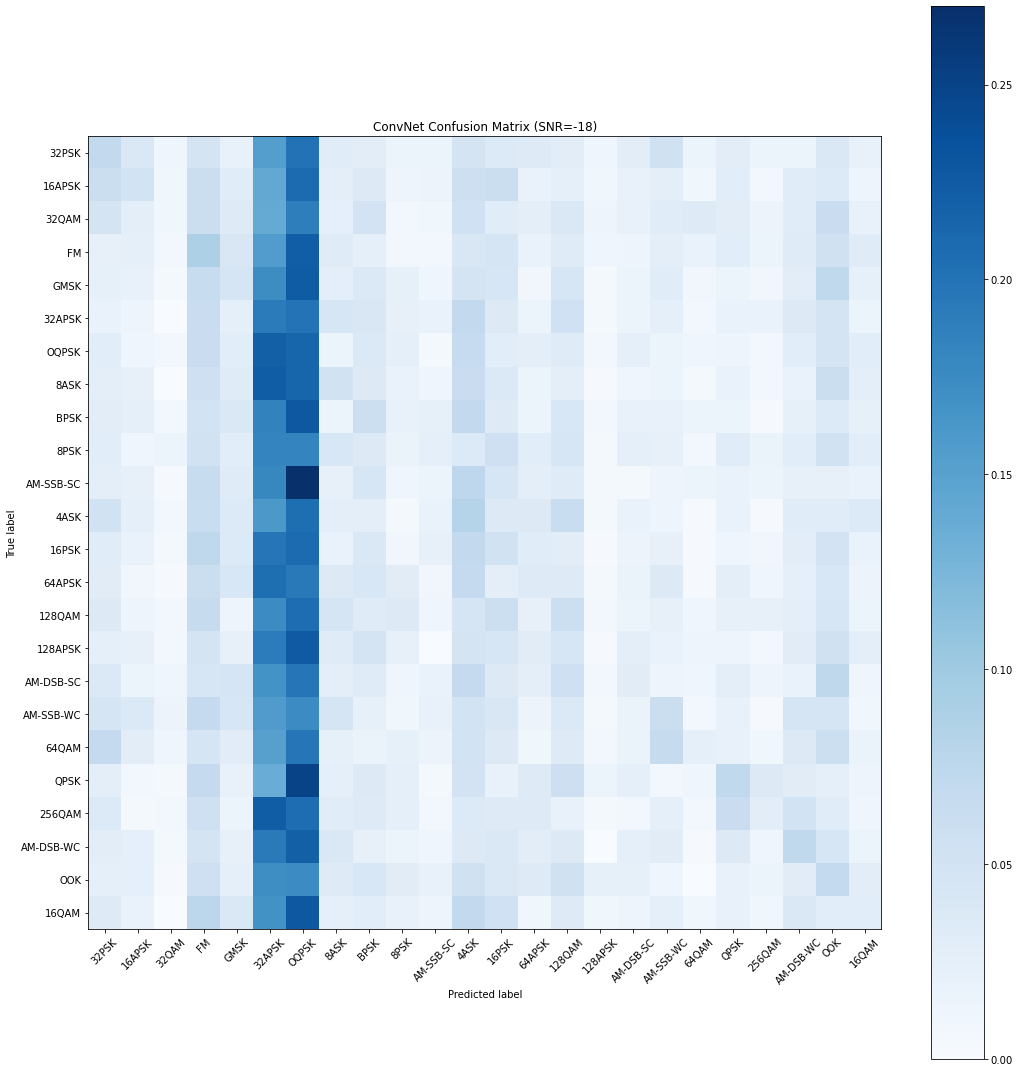

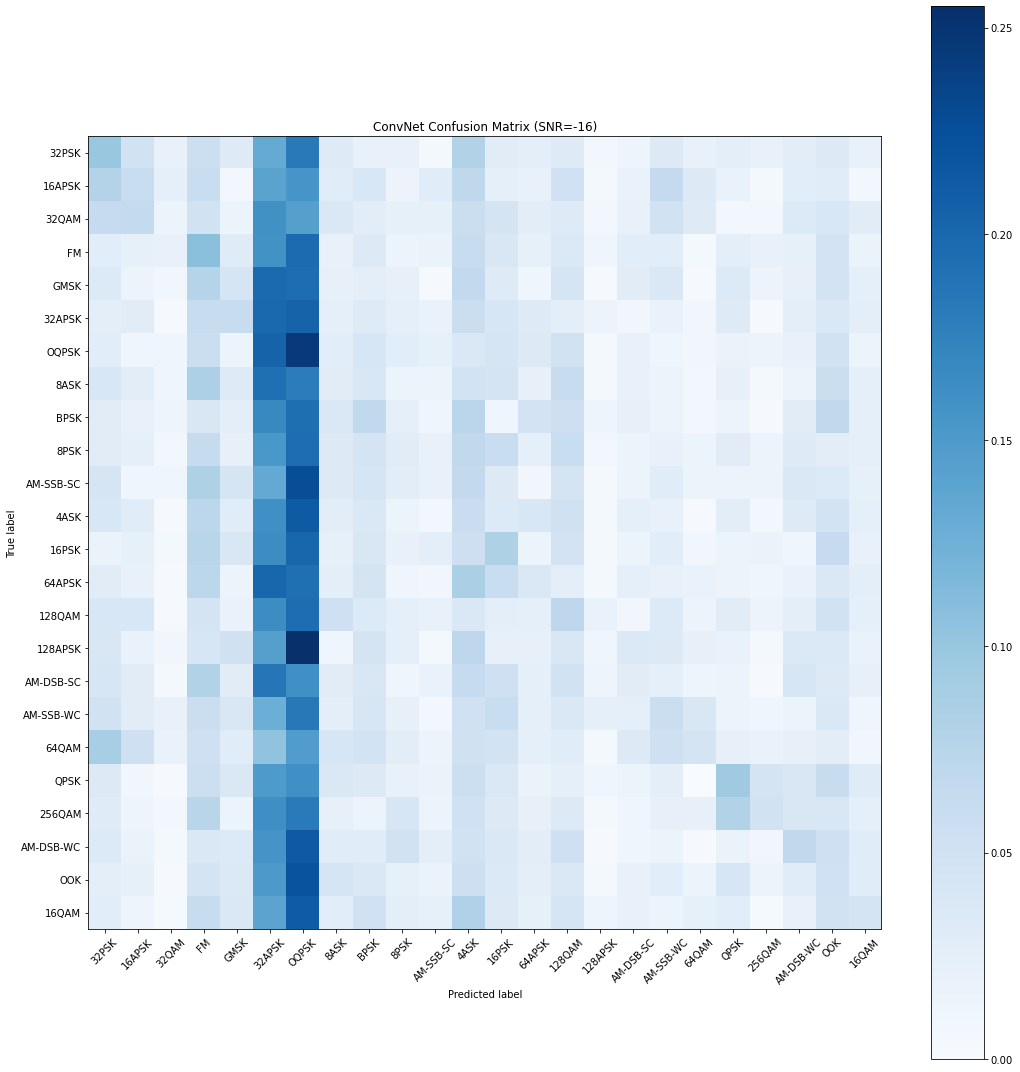

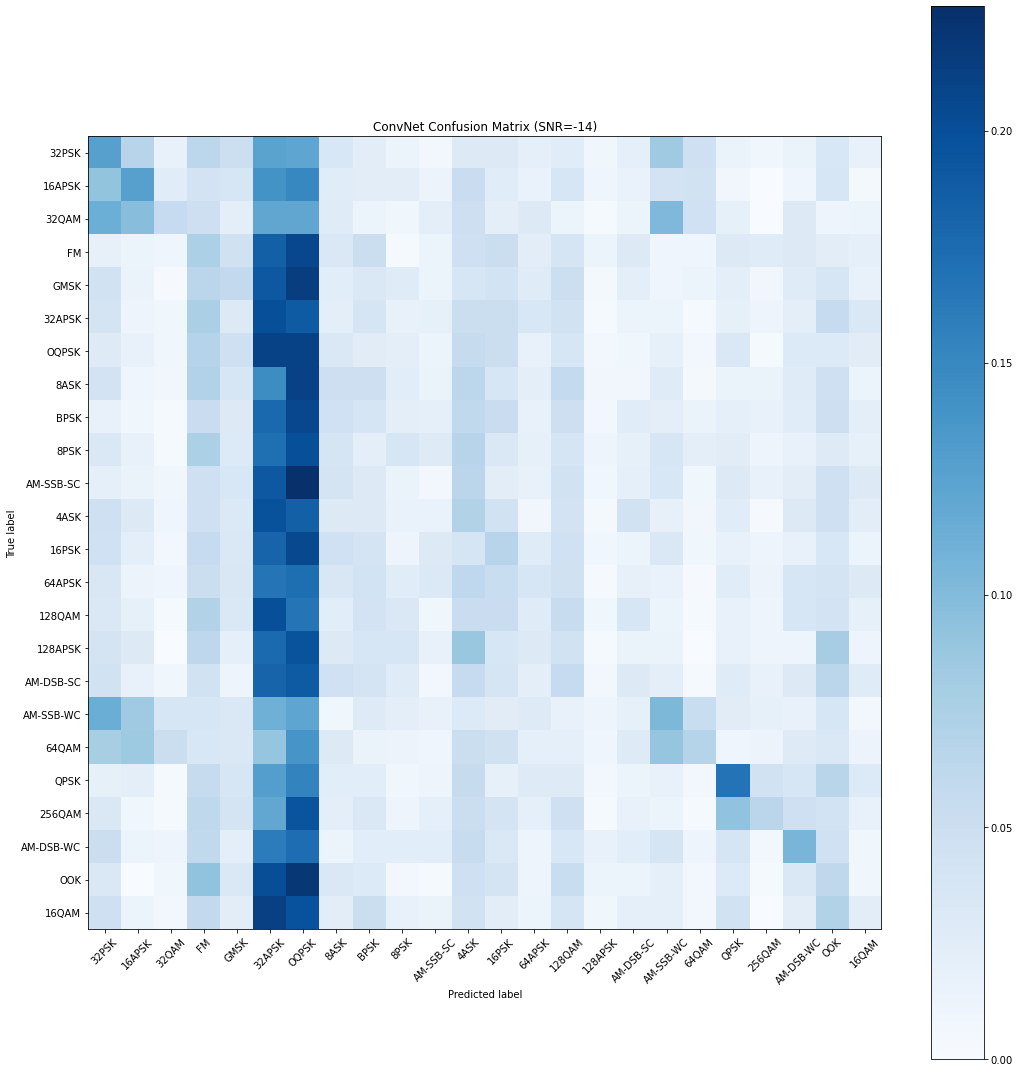

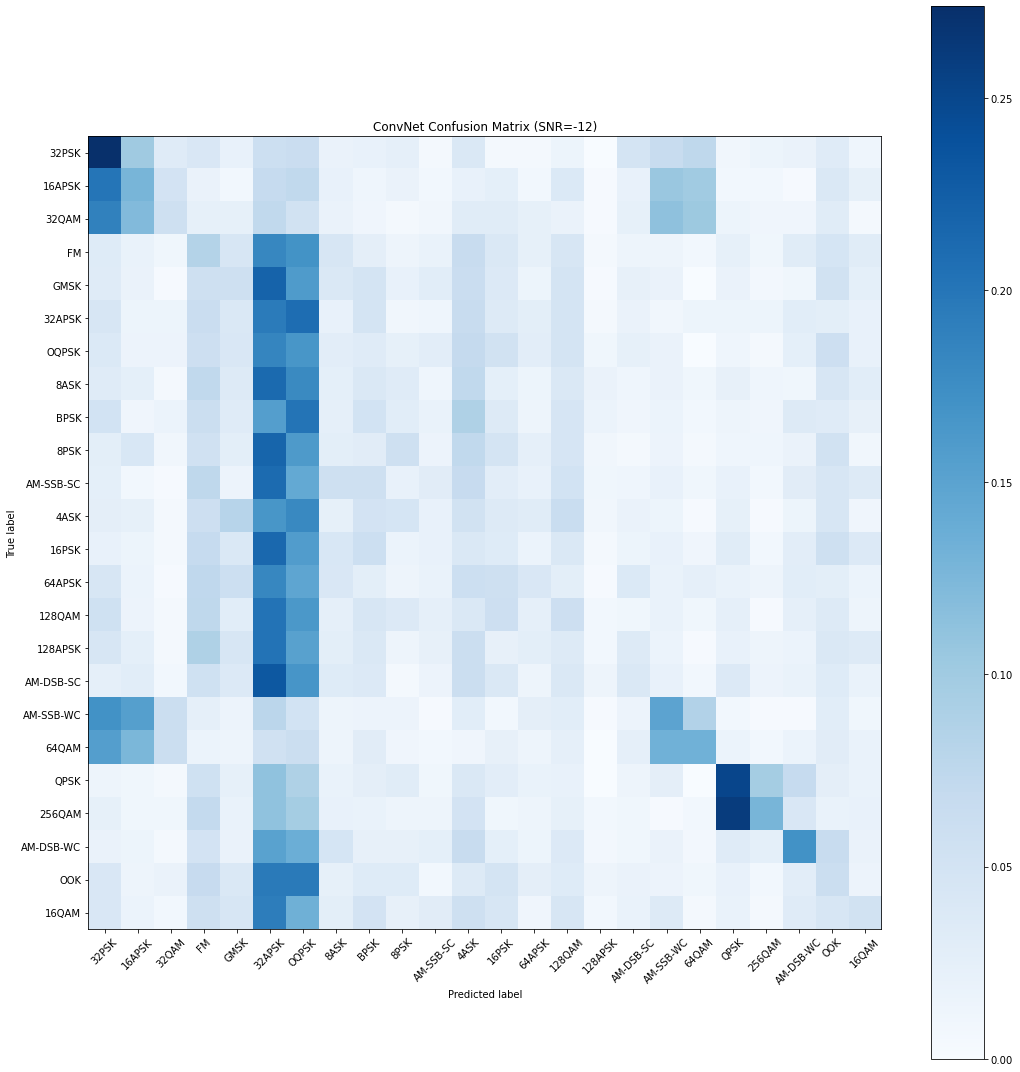

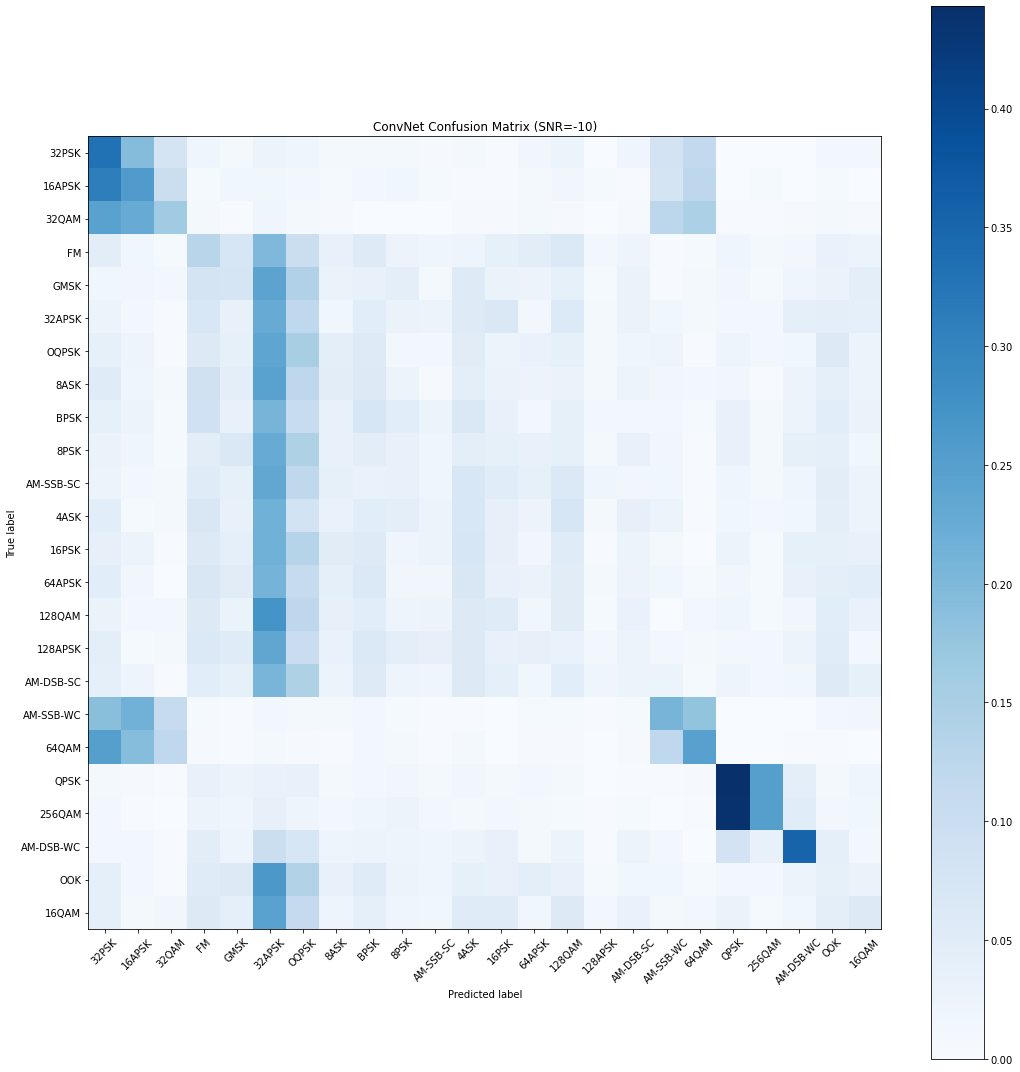

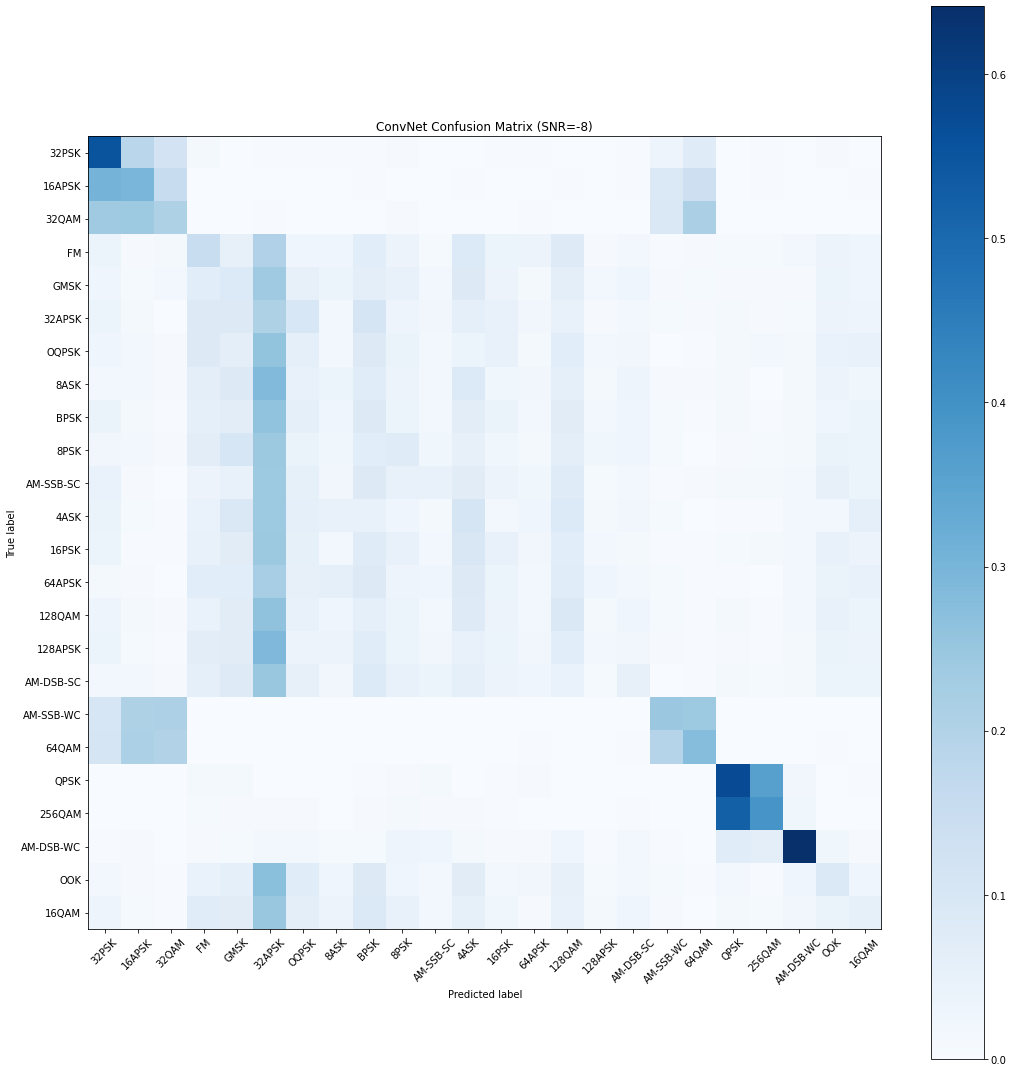

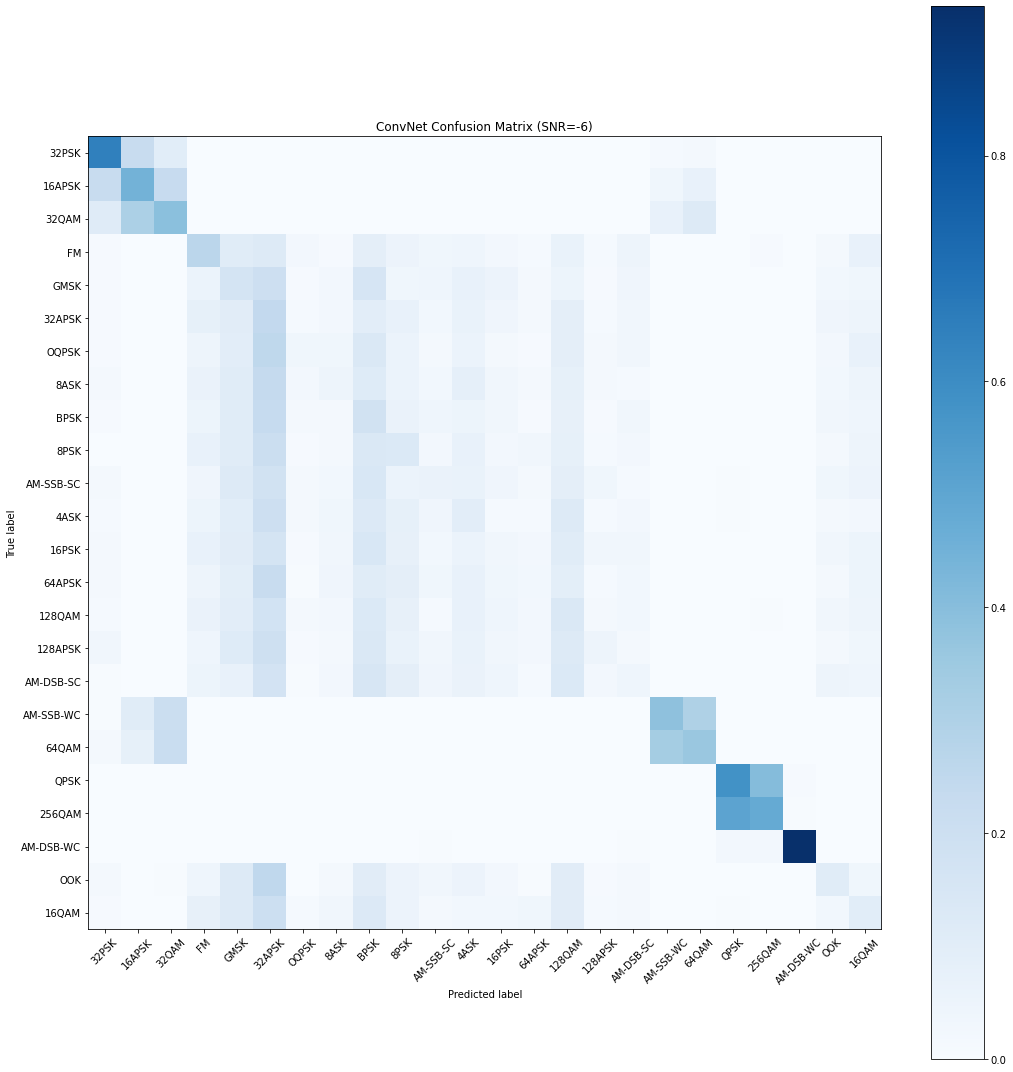

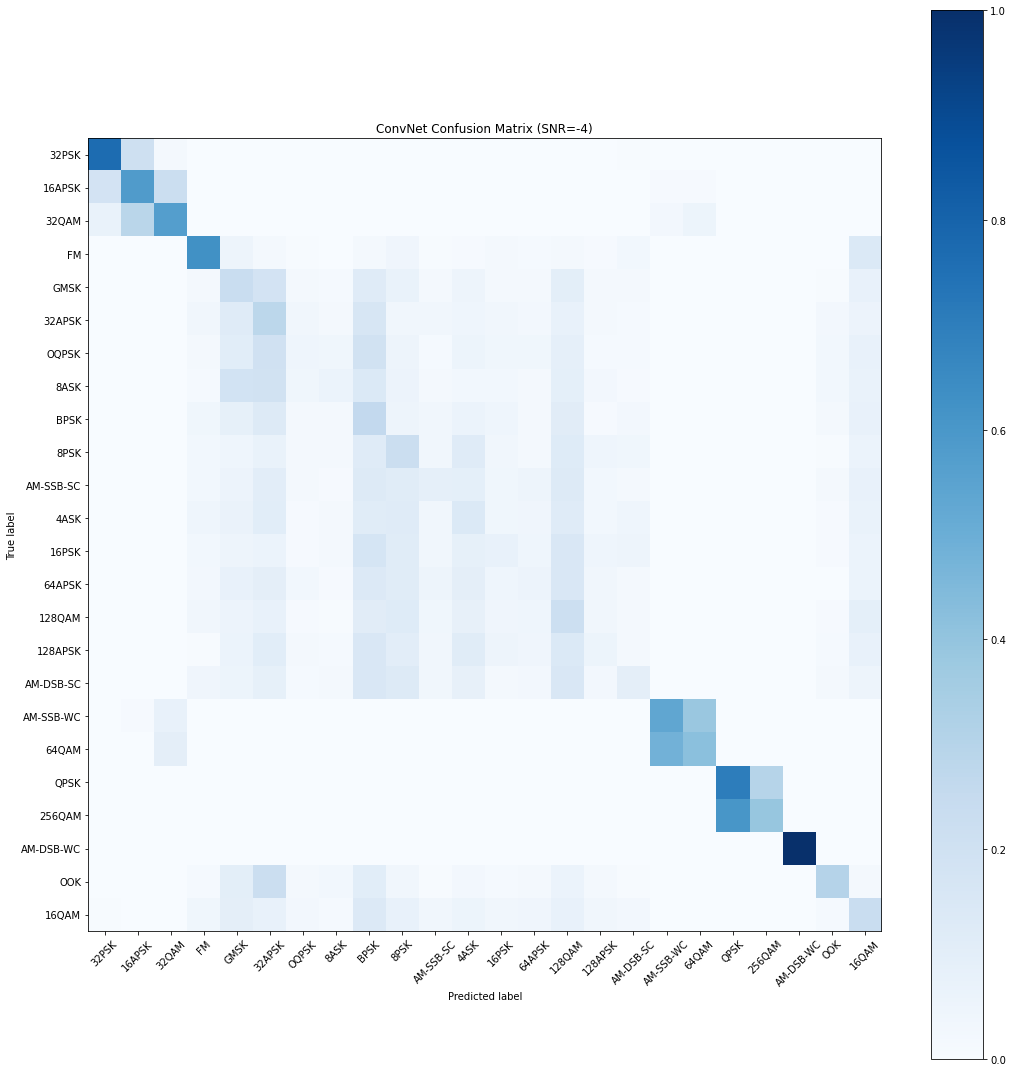

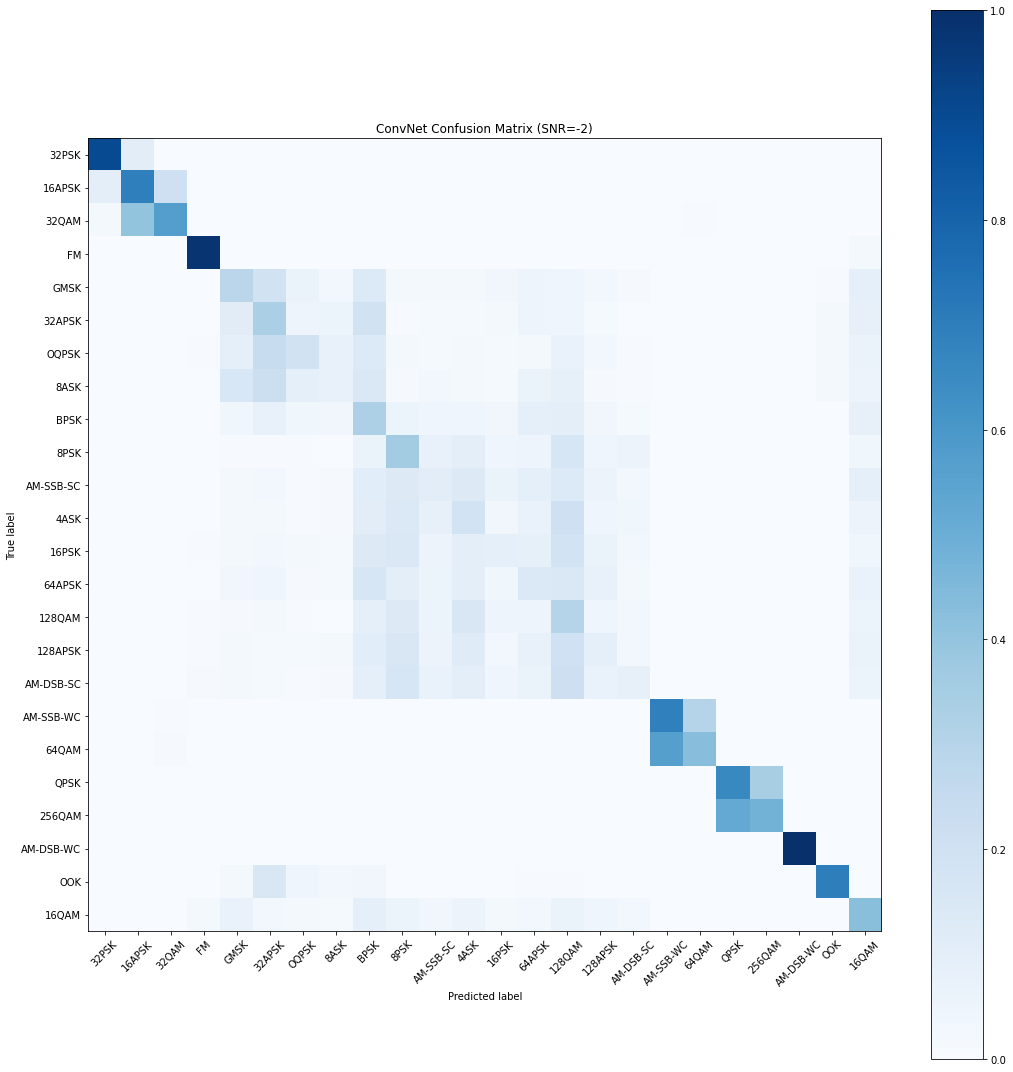

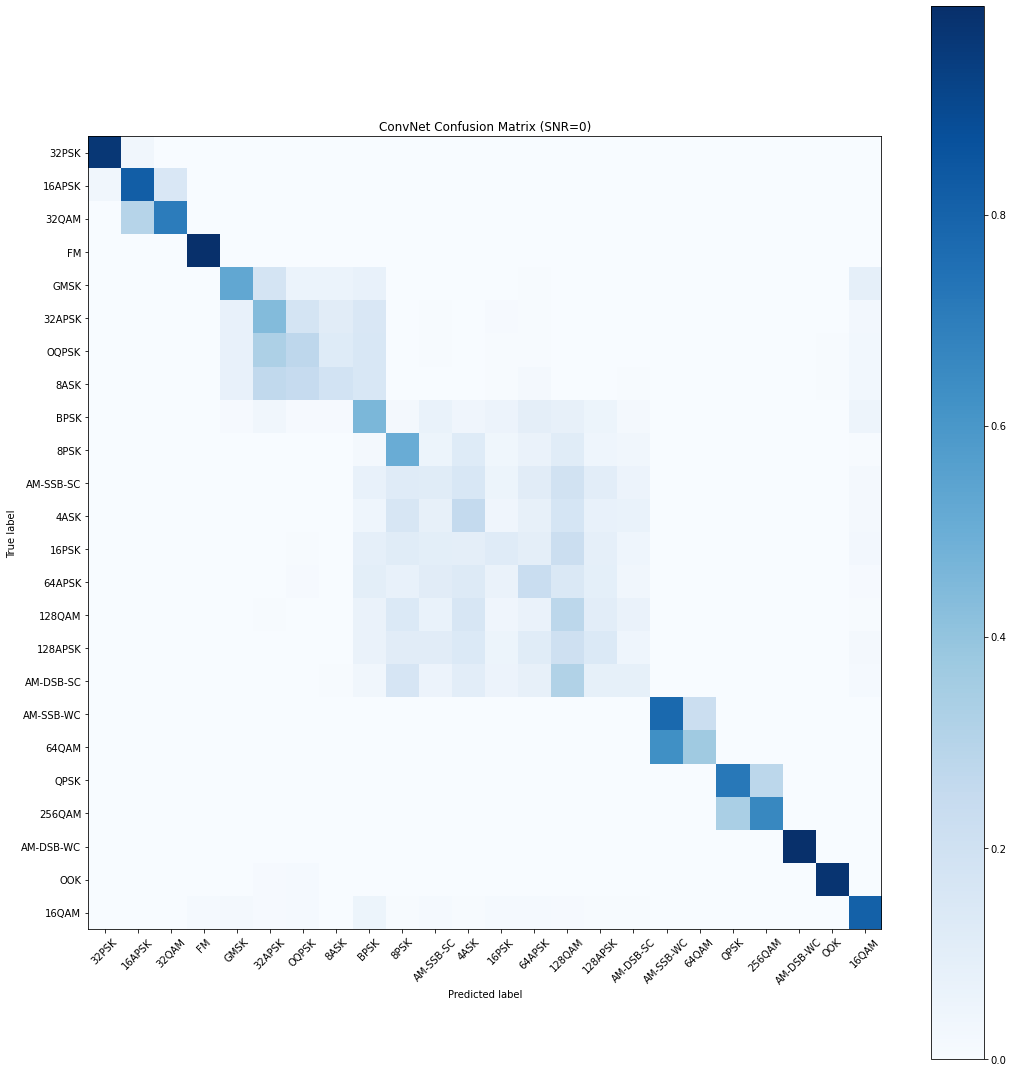

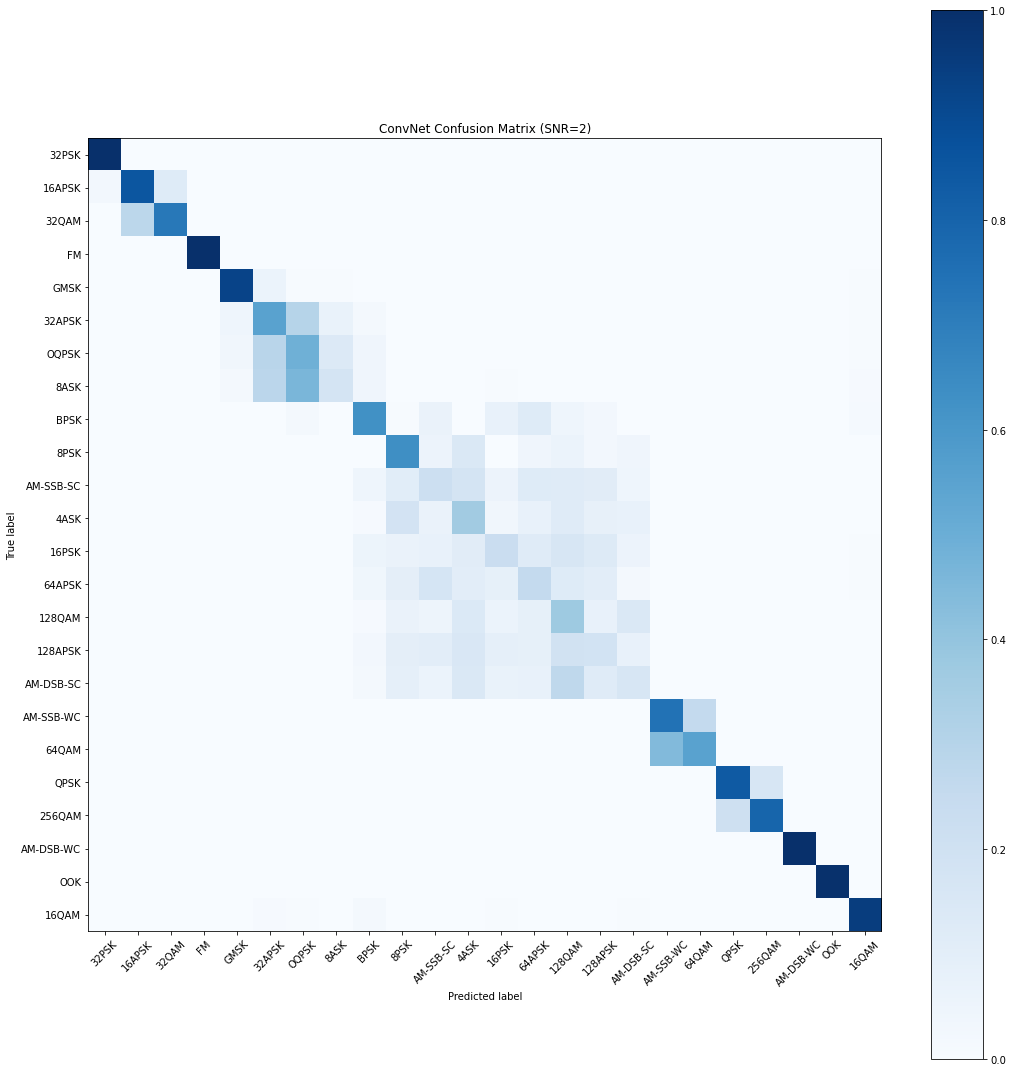

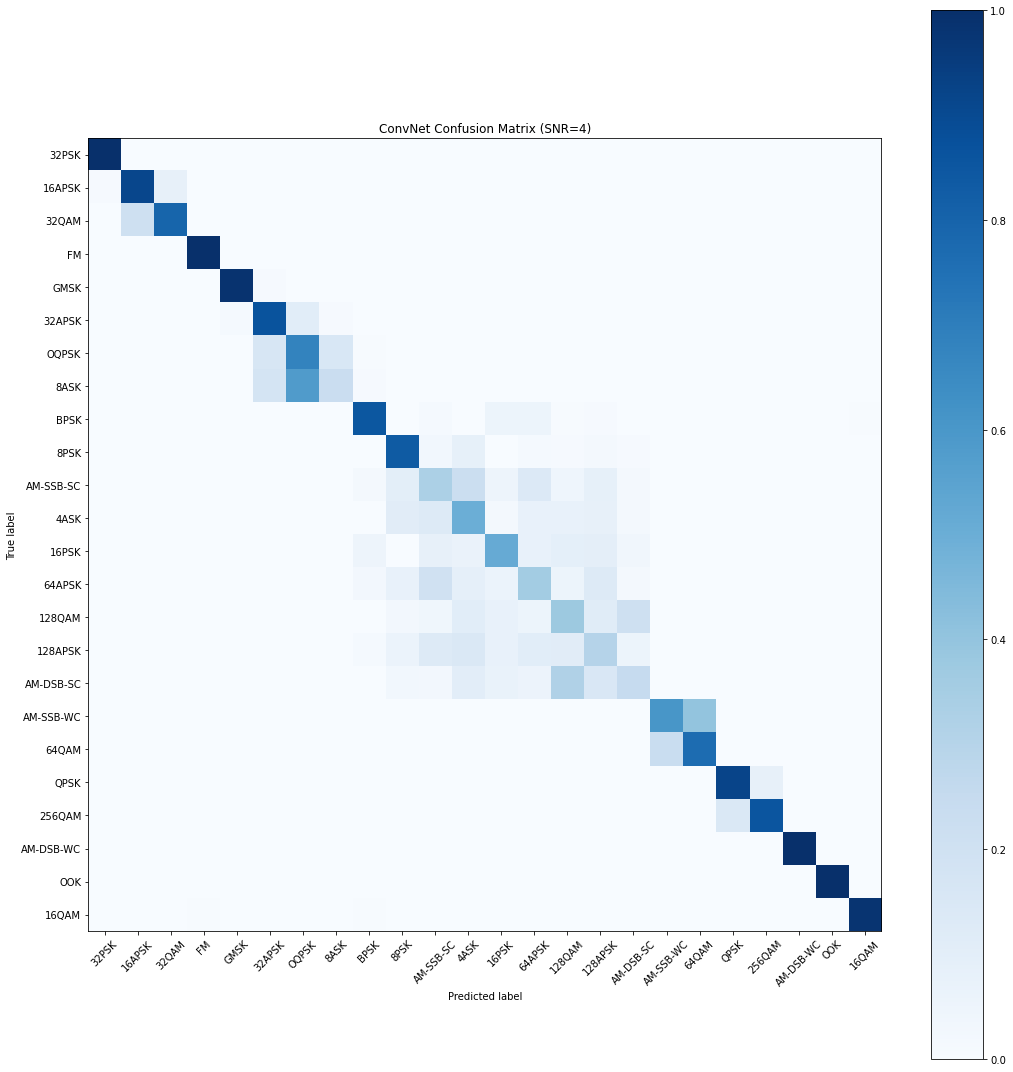

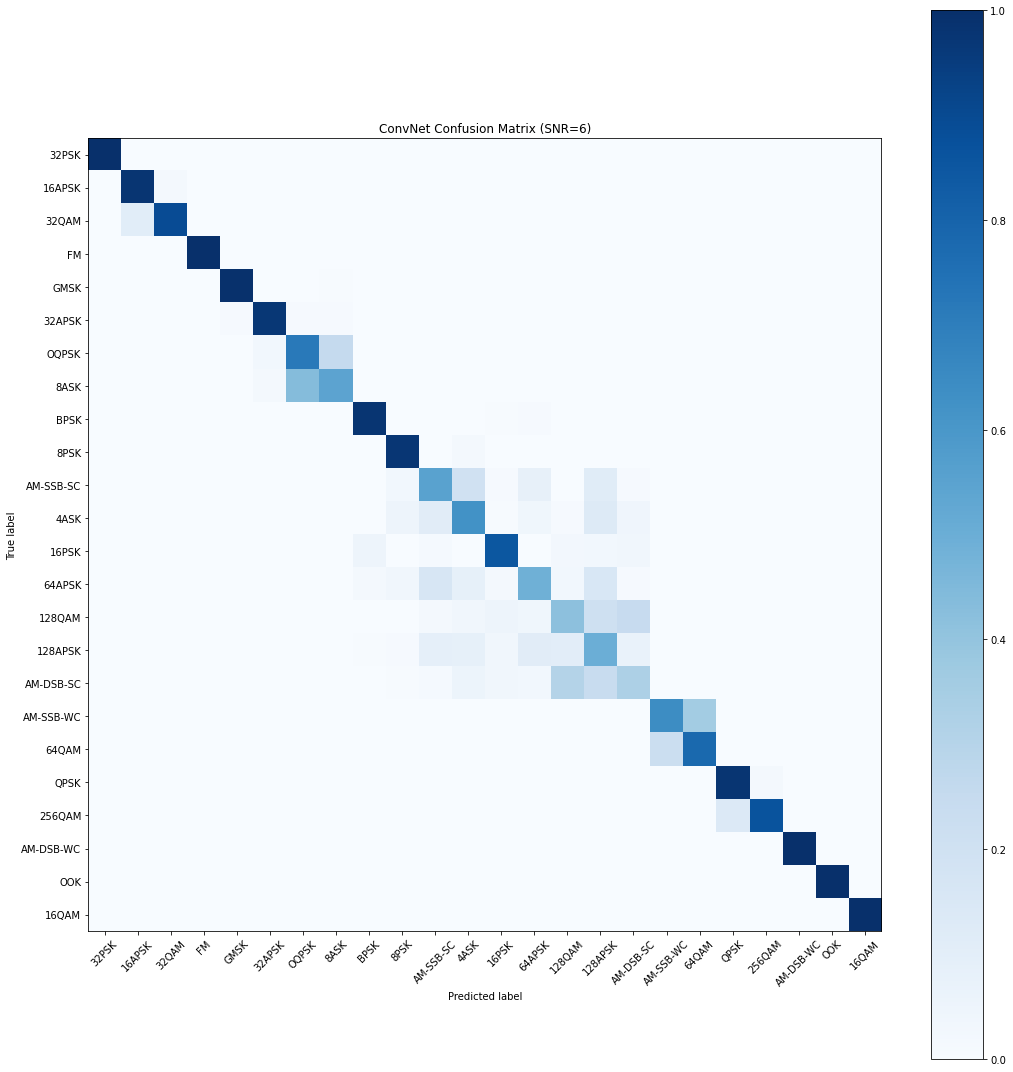

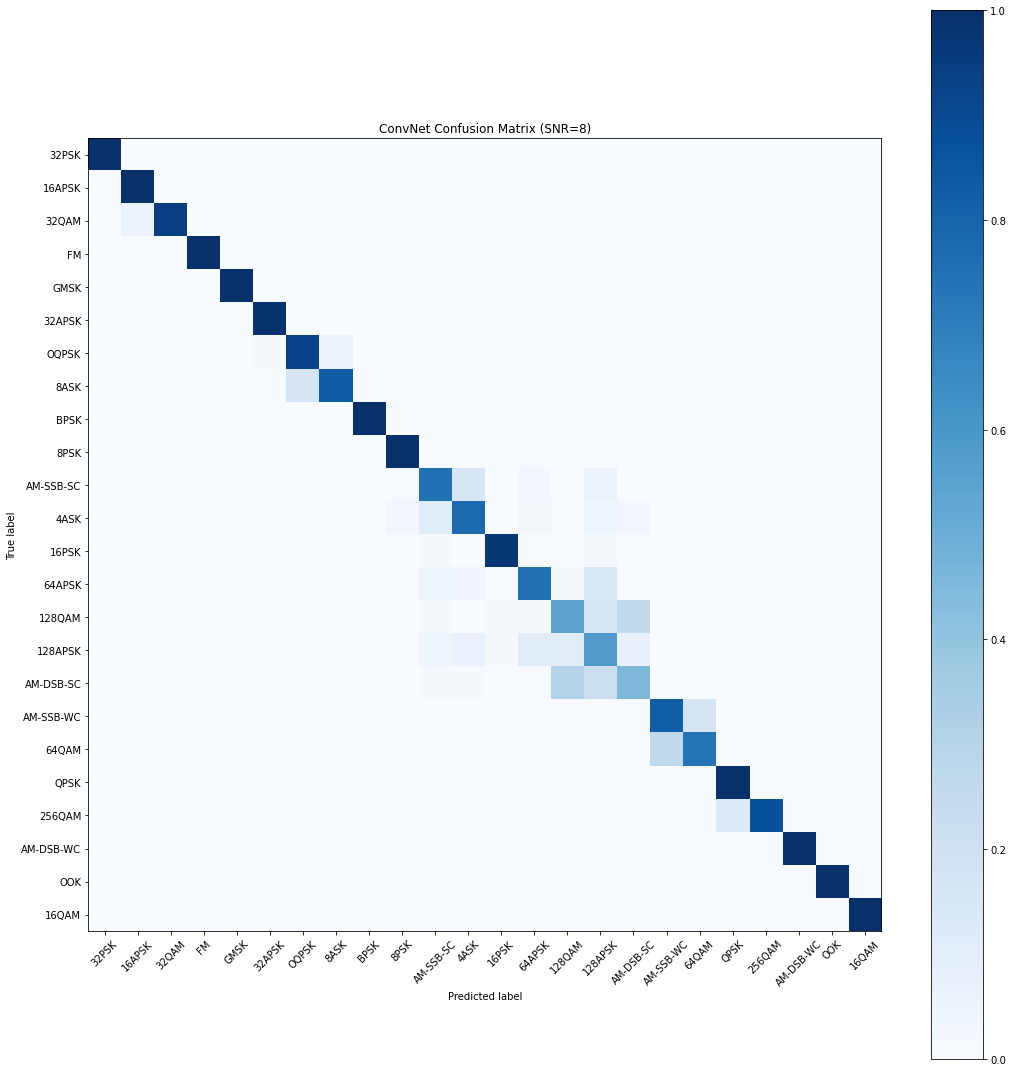

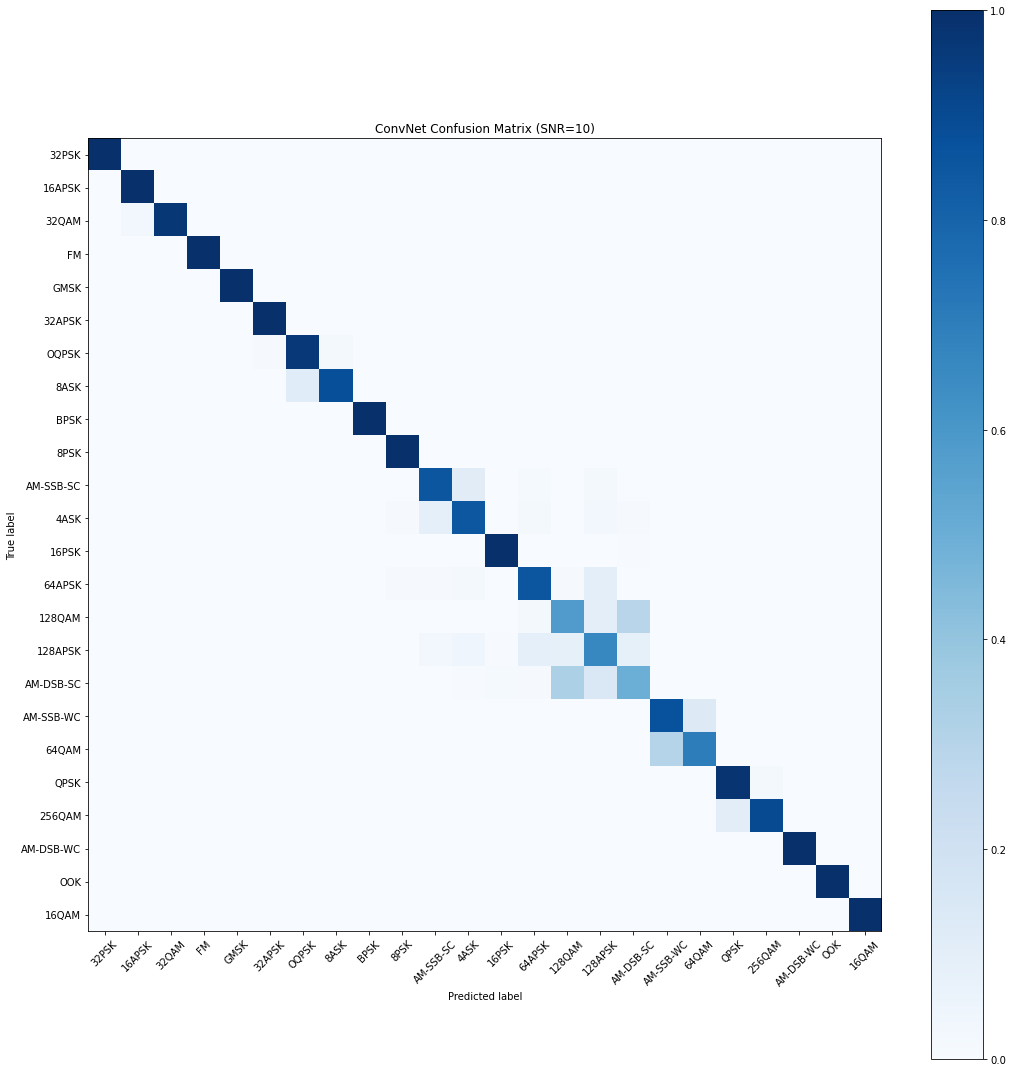

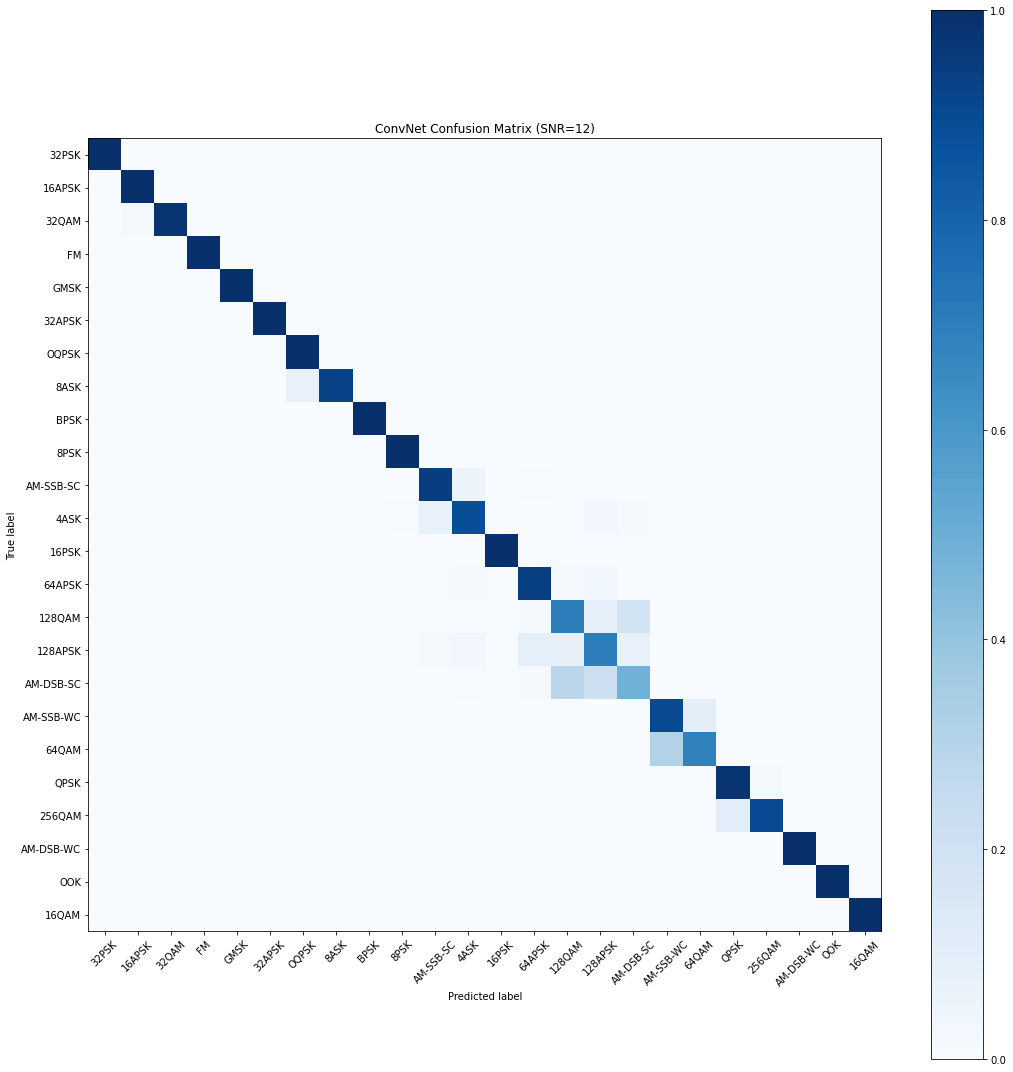

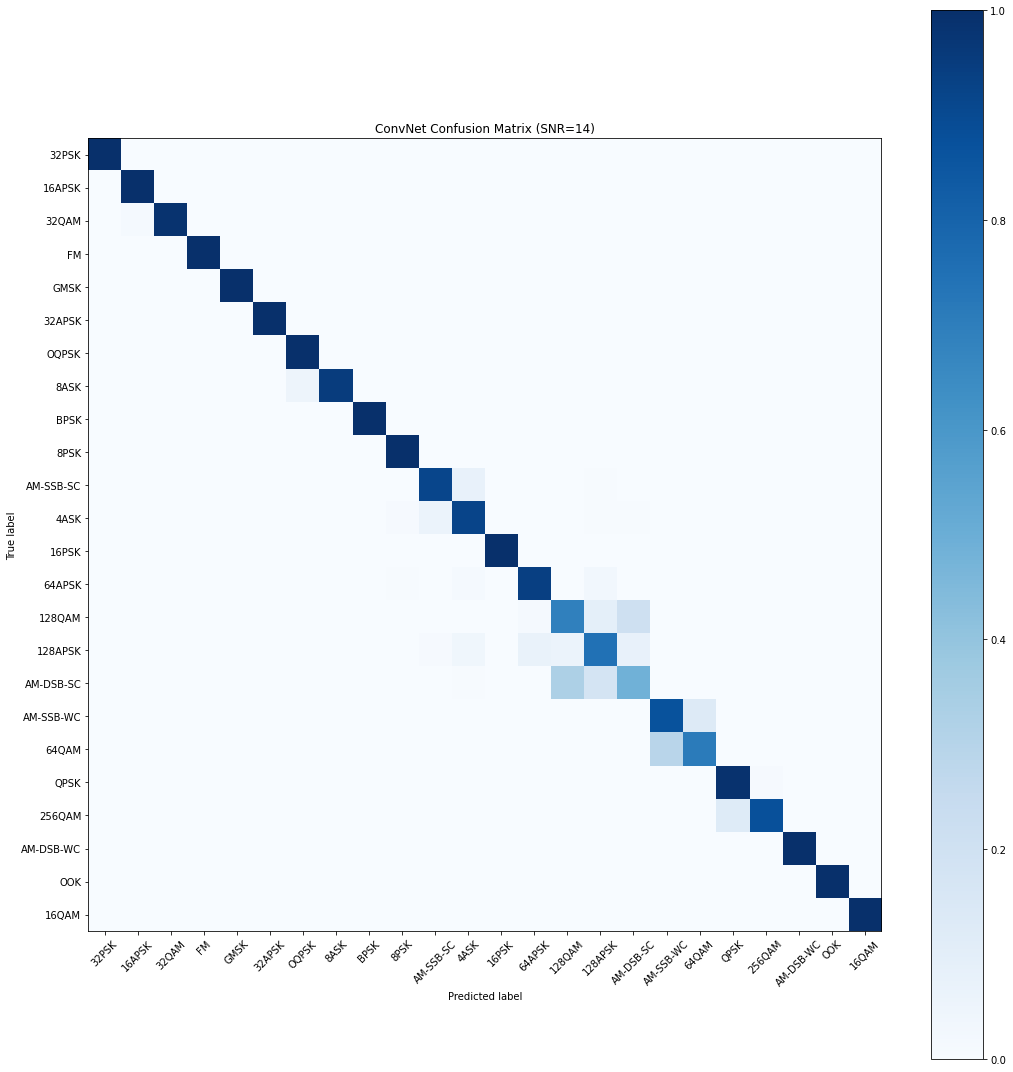

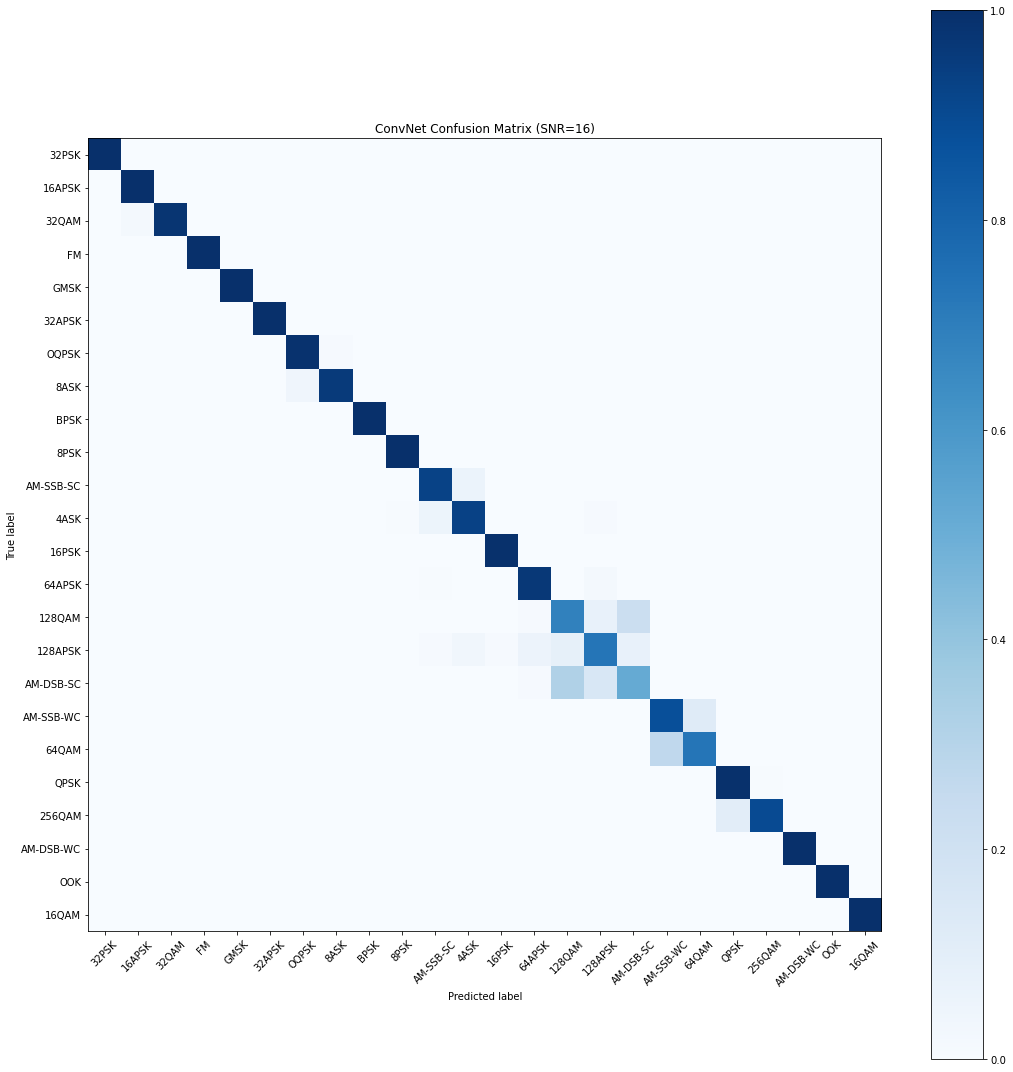

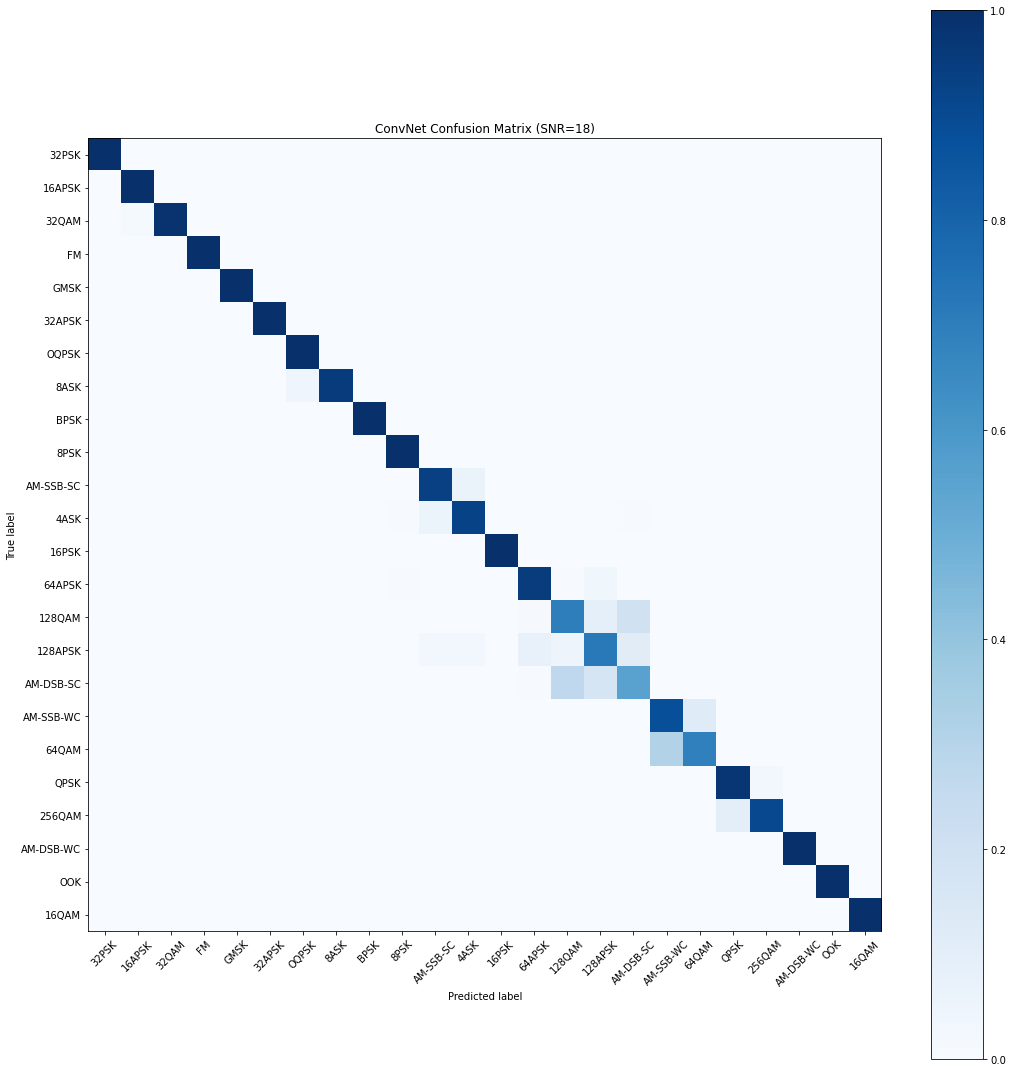

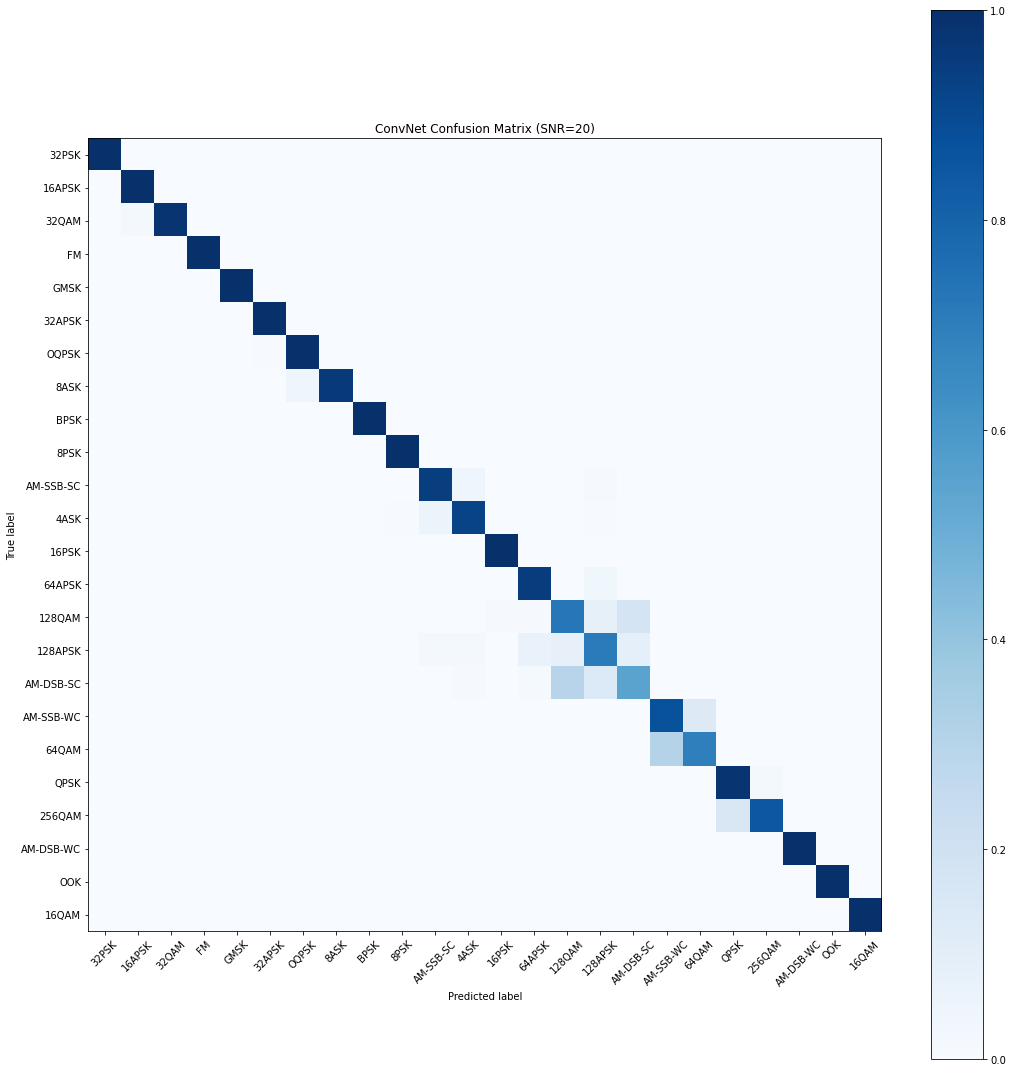

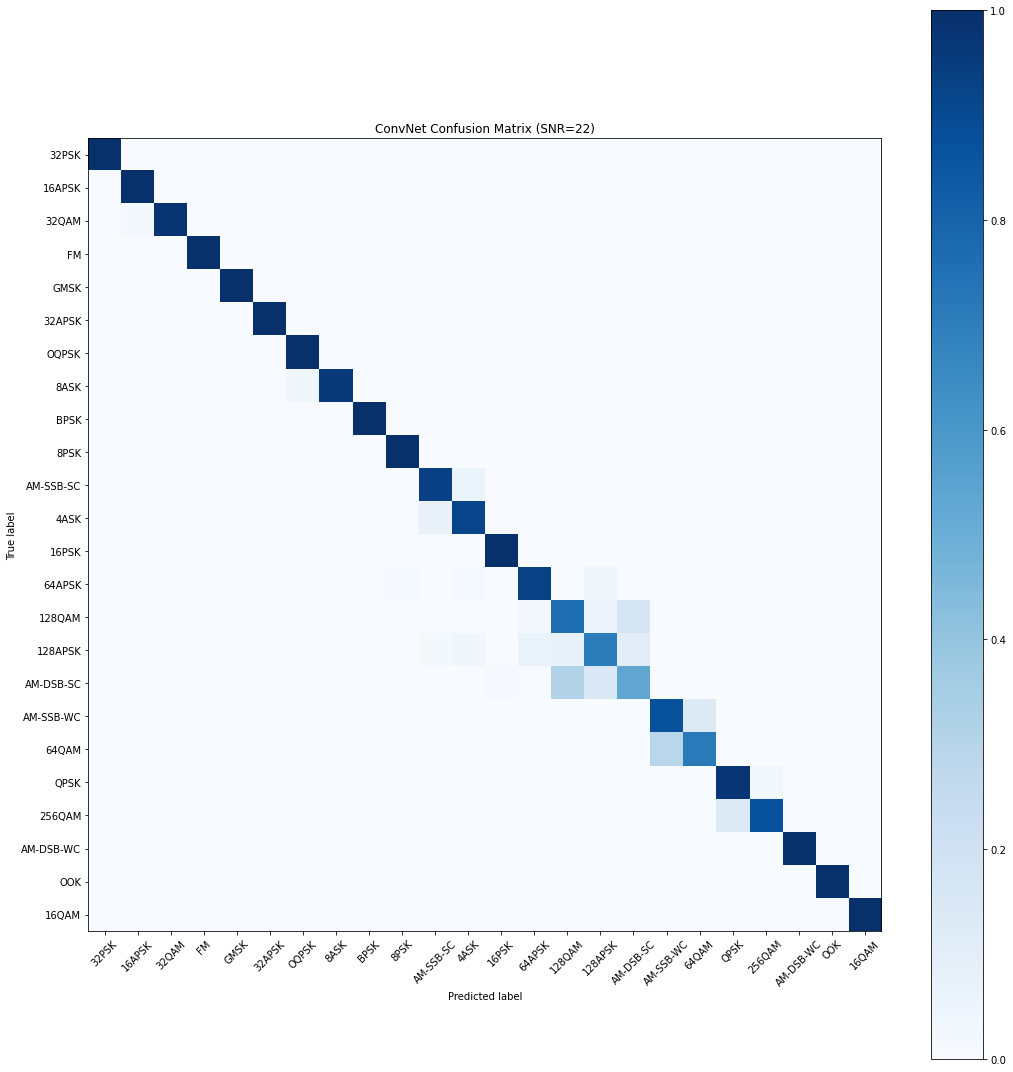

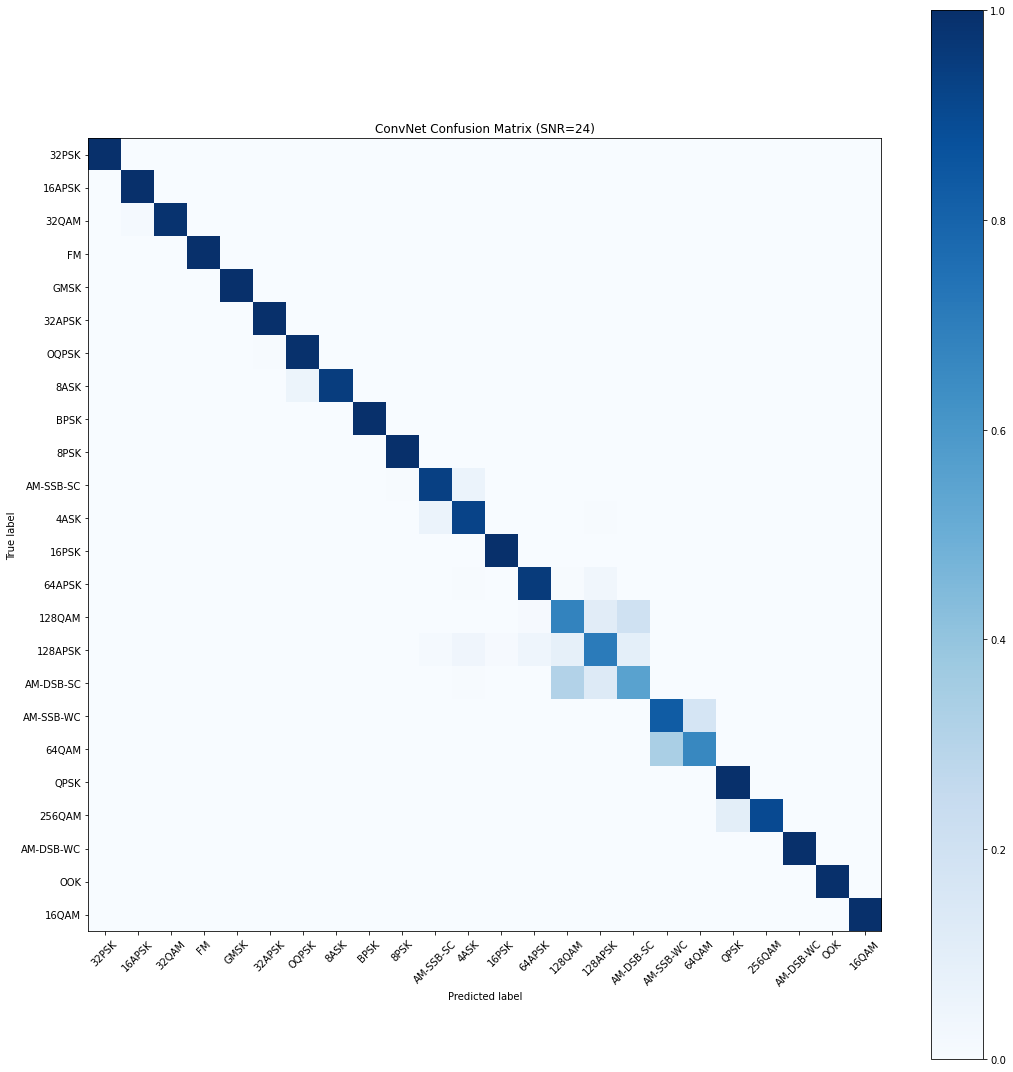

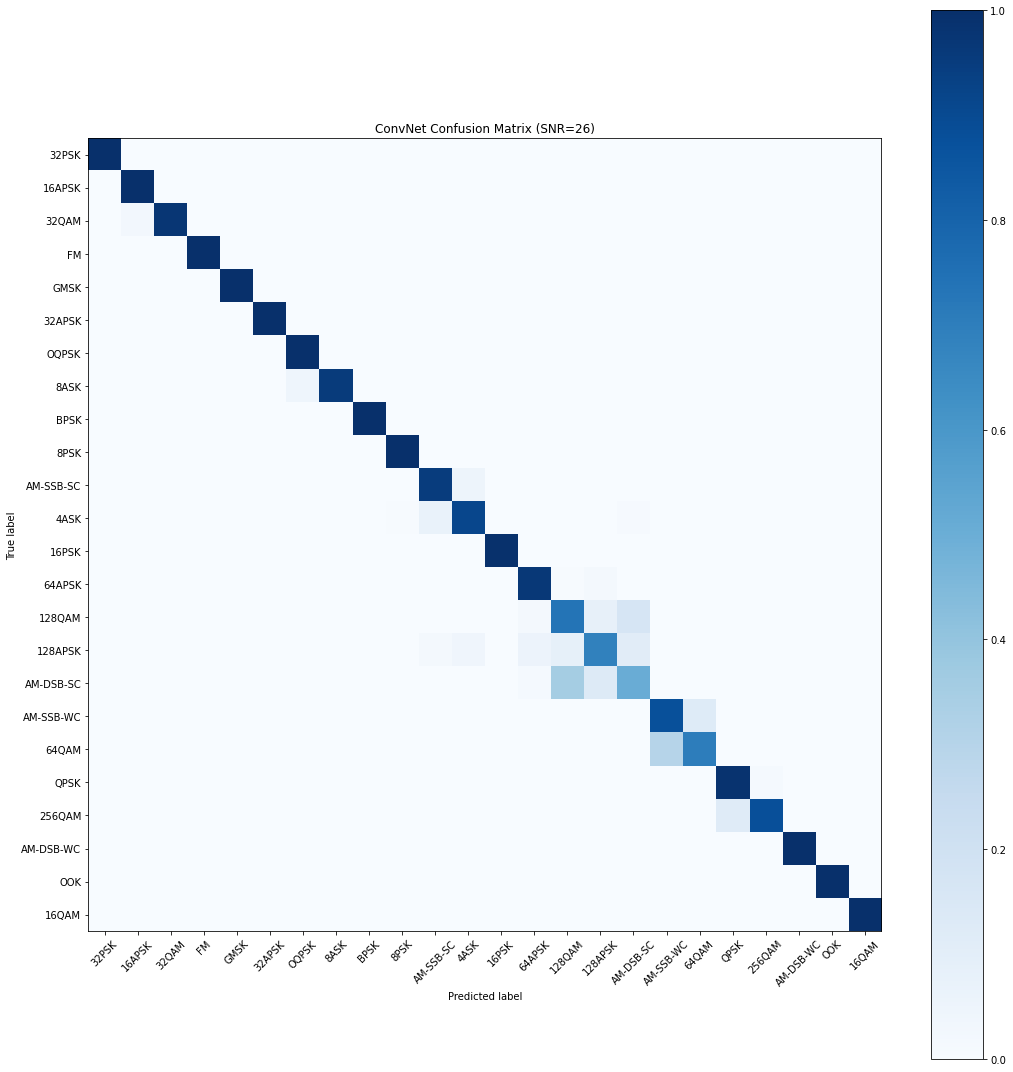

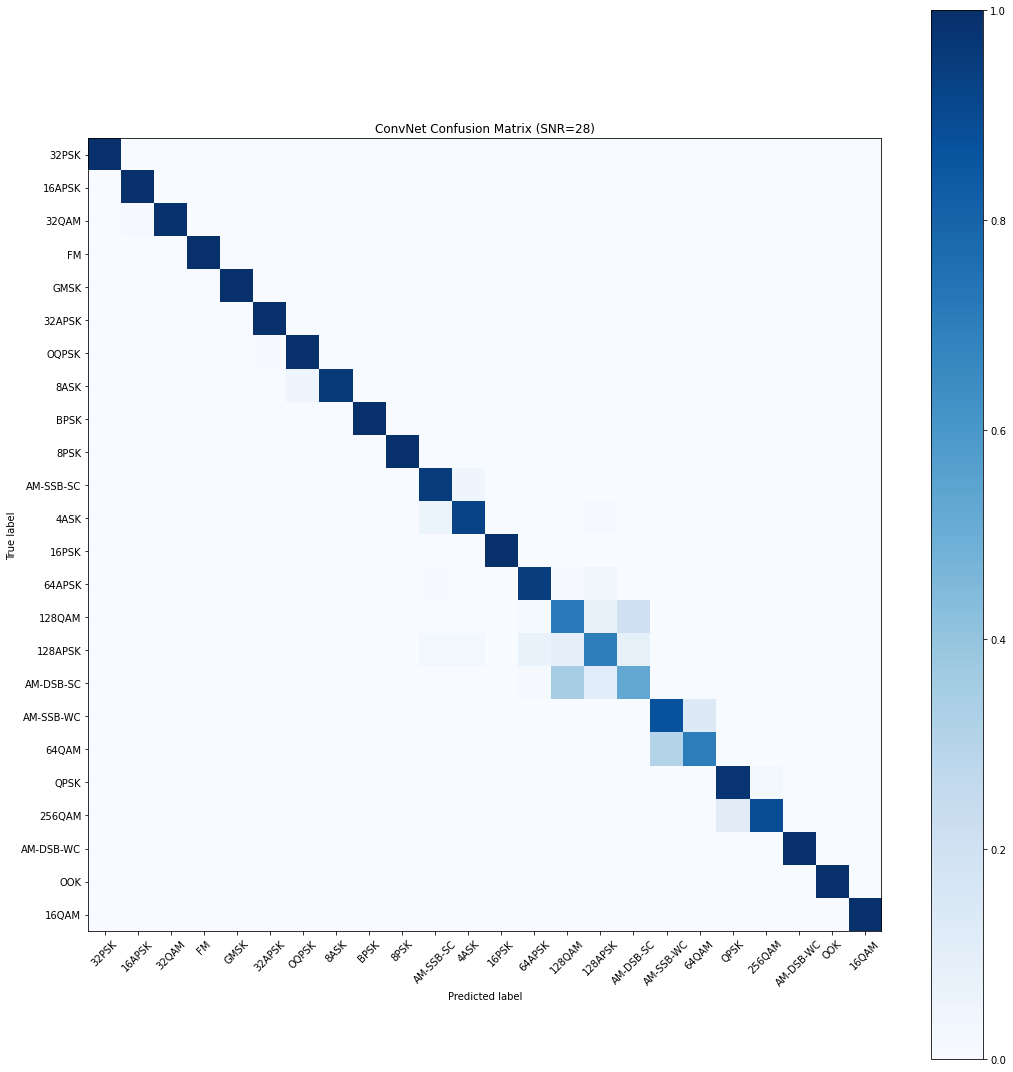

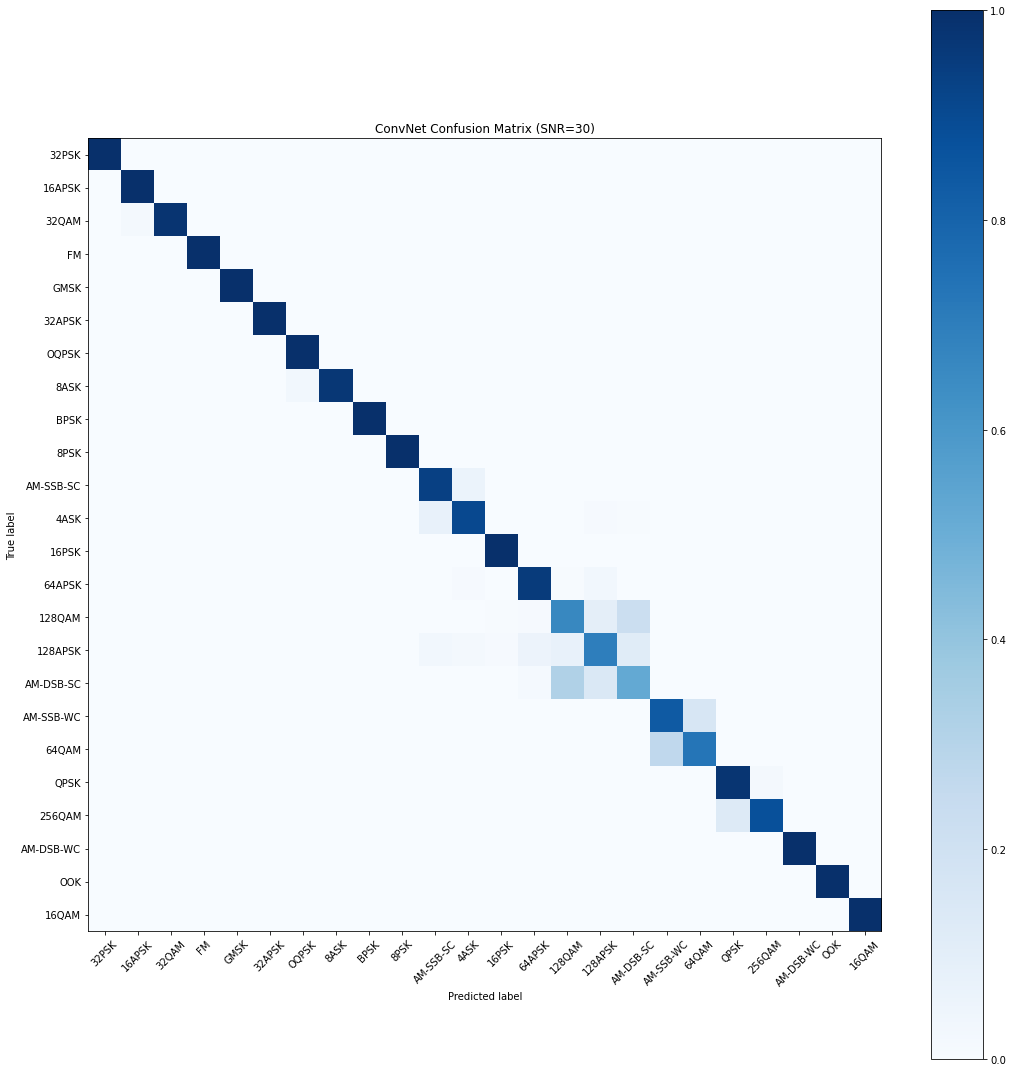

In [25]:
snrs = [-20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,
        0,   2,   4,   6,   8,  10,  12,  14, 16,  18,  20,  22,  24,  26,  28,  30]
for snr in snrs:
    # extract classes @ SNR
    test_SNRs = ts_z
    test_X_i = ts_x[np.where(test_SNRs==snr)[0]]
    test_Y_i = ts_y[np.where(test_SNRs==snr)[0]]
    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

Text(0.5, 1.0, 'CNN2 Classification Accuracy on RadioML 2016.10 Alpha')

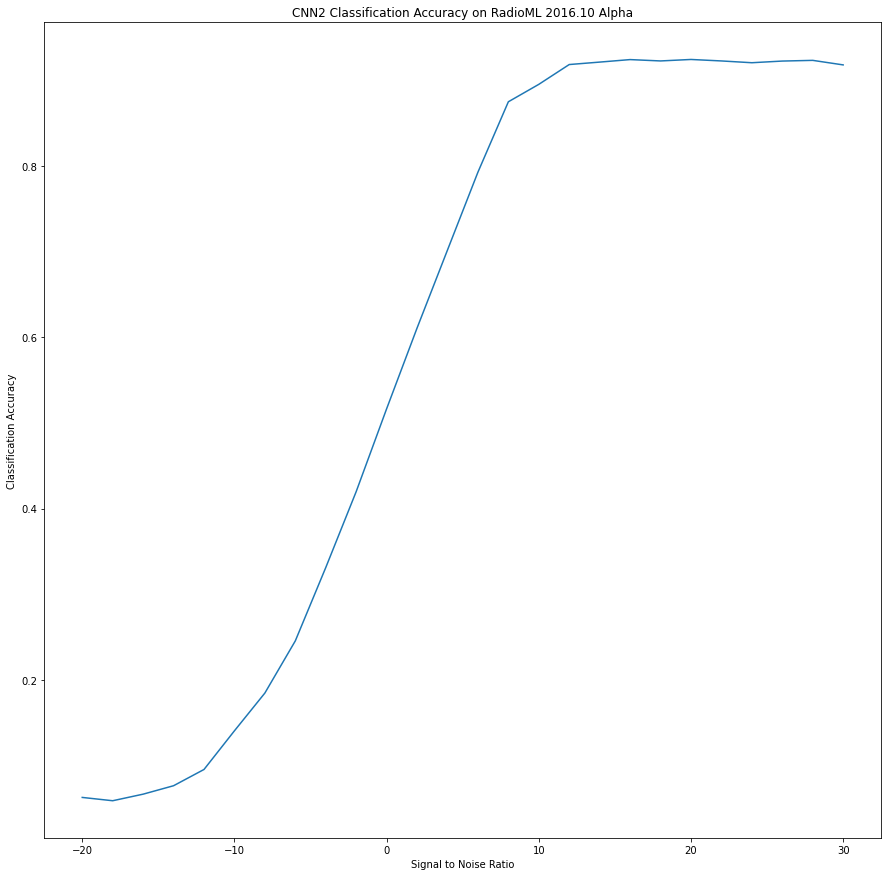

In [26]:
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")